In [2]:
from google.colab import drive
drive.mount("/content/dirve")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/dirve


In [0]:
# !pip install tensorflow-gpu==2.2.0rc2

In [4]:
%cd /content/dirve/My Drive/BT_ML

/content/dirve/My Drive/BT_ML


In [0]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Flatten, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [0]:
def model_build():
  model = Sequential()
  input_shape=(150, 150, 3)


  model.add(Conv2D(16, (3, 3), activation="relu", input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  # model.summary()
  return model

# model_build()

In [0]:
path_train_data = "train_folder"
path_test_data = "valid_folder"

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Make date augment
train_agument = ImageDataGenerator(rescale=1.0/255.0)
                                  #  rotation_range=20, 
                                  #  width_shift_range=0.2, 
                                  #  height_shift_range=0.2, 
                                  #  shear_range=0.2, 
                                  #  zoom_range=0.2, 
                                  #  horizontal_flip=True)

valid_agument = ImageDataGenerator(rescale=1.0/255.0) 
                                  #  rotation_range=20, 
                                  #  width_shift_range=0.2, 
                                  #  height_shift_range=0.2, 
                                  #  shear_range=0.2, 
                                  #  zoom_range=0.2, 
                                  #  horizontal_flip=True)

# Dataset train from dir
train_generator = train_agument.flow_from_directory(path_train_data,
                                                     batch_size = 32,
                                                     class_mode = 'binary',
                                                     target_size = (150, 150))
# Dataset test from dir
test_generator = valid_agument.flow_from_directory(path_test_data,
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   target_size = (150, 150)
                                                   )


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [17]:
test_generator.num_classes

2

In [0]:
# Training data augment
model = model_build()
# Compiling
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])

In [0]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="./weights/model.{epoch:02d}-{val_accuracy:.2f}.h5", 
                                                monitor="val_accuracy", 
                                                verbose=1,
                                                save_best_only=True)

In [41]:
# Training with data genertator
history = model.fit(train_generator, 
                              validation_data=test_generator, 
                              steps_per_epoch=8, 
                              epochs=15, 
                              validation_steps=8, 
                              verbose=1,
                              callbacks=[checkpoint])

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 2.3773 - accuracy: 0.5000
Epoch 00001: val_accuracy improved from -inf to 0.53516, saving model to ./weights/model.01-0.54.h5
8/8 [==============================] - 3s 435ms/step - loss: 2.3773 - accuracy: 0.5000 - val_loss: 0.6346 - val_accuracy: 0.5352
Epoch 2/15
8/8 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.7500
Epoch 00002: val_accuracy did not improve from 0.53516
8/8 [==============================] - 3s 375ms/step - loss: 0.5280 - accuracy: 0.7500 - val_loss: 0.9395 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.7500
Epoch 00003: val_accuracy did not improve from 0.53516
8/8 [==============================] - 3s 369ms/step - loss: 0.5617 - accuracy: 0.7500 - val_loss: 1.4704 - val_accuracy: 0.5156
Epoch 4/15
8/8 [==============================] - ETA: 0s - loss: 0.3552 - accuracy: 0.8633
Epoch 00004: val_accuracy improved 

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

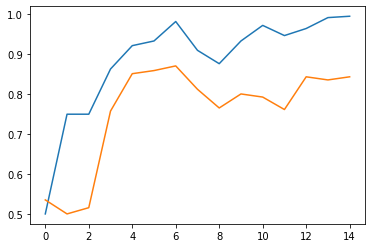

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

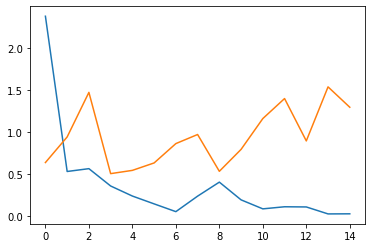

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [0]:
model.save("./weights/model_tu_train.h5")

In [122]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

saved_model = load_model("./weights/model.06-0.86.h5")

path_image = "/content/dirve/My Drive/BT_ML/tao.jpg"
image = cv2.imread(path_image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image, (150, 150))

image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)
print(image.shape)
# image
pred = saved_model.predict(image, batch_size=10)[0][0]

if pred > 0.5:
  print("Preson")
else:
  print("Horse")

(1, 150, 150, 3)
Preson


In [100]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():
  path = "./" + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img) / 255.0

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  # print(images)
  
  classes = saved_model.predict(images, batch_size=10)

  print(classes)

Saving tao.jpg to tao (1).jpg
[[0.8630575]]


In [92]:
output_layer = [
                layer.output for layer in model.layers
]
output_layer

[<tf.Tensor 'conv2d_29/Identity:0' shape=(None, 148, 148, 16) dtype=float32>,
 <tf.Tensor 'max_pooling2d_27/Identity:0' shape=(None, 74, 74, 16) dtype=float32>,
 <tf.Tensor 'conv2d_30/Identity:0' shape=(None, 72, 72, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_28/Identity:0' shape=(None, 36, 36, 32) dtype=float32>,
 <tf.Tensor 'conv2d_31/Identity:0' shape=(None, 34, 34, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_29/Identity:0' shape=(None, 17, 17, 64) dtype=float32>,
 <tf.Tensor 'flatten_9/Identity:0' shape=(None, 18496) dtype=float32>,
 <tf.Tensor 'dense_18/Identity:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense_19/Identity:0' shape=(None, 1) dtype=float32>]

Saving horse.jpg to horse (1).jpg
148
74
72
36
34
17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


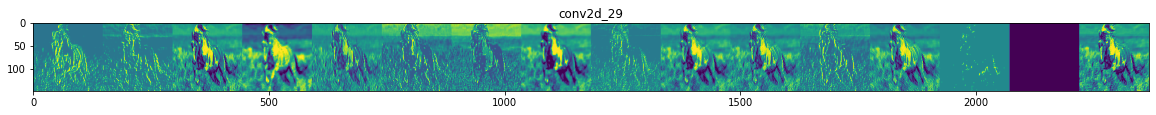

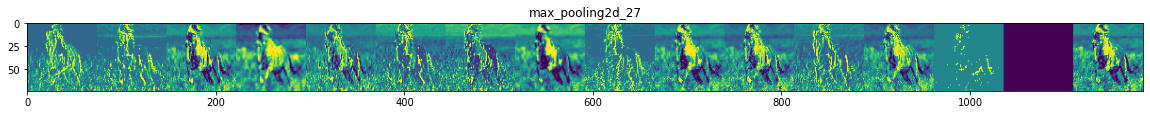

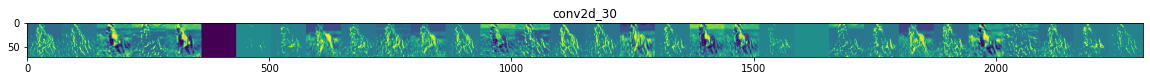

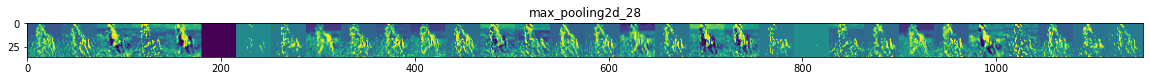

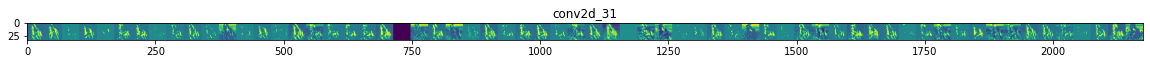

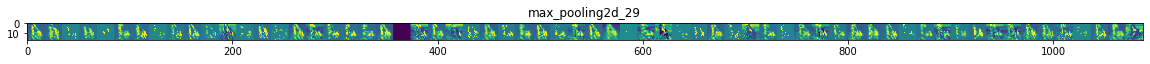

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.models import load_model


uploaded = files.upload()

for fn in uploaded.keys():

  path = "./" + fn
  img = image.load_img(path=path, target_size=(150, 150))
  x = image.img_to_array(img) / 255.0

  x = x.reshape((1,) + x.shape)

  visualization_feature_maps = tf.keras.models.Model(inputs=model.input, outputs=output_layer)
  successive_feature_maps = visualization_feature_maps.predict(x)

  layer_names = [layer.name for layer in model.layers]
  
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]
      size = feature_map.shape[1]
      print(size)
      display_grid = np.zeros((size, size*n_features))
      for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *=64
        x += 128
        x = np.clip(x, 0, 255).astype("uint8")
        display_grid[:, i * size : (i+1) * size] = x

      scale = 20./n_features
      plt.figure(figsize=(scale*n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect="auto", cmap="viridis")